C:\Users\Juanchi\AppData\Local\Temp\ipykernel_2764\3412414966.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ofertas_por_empresa.values, y=ofertas_por_empresa.index, palette='viridis')


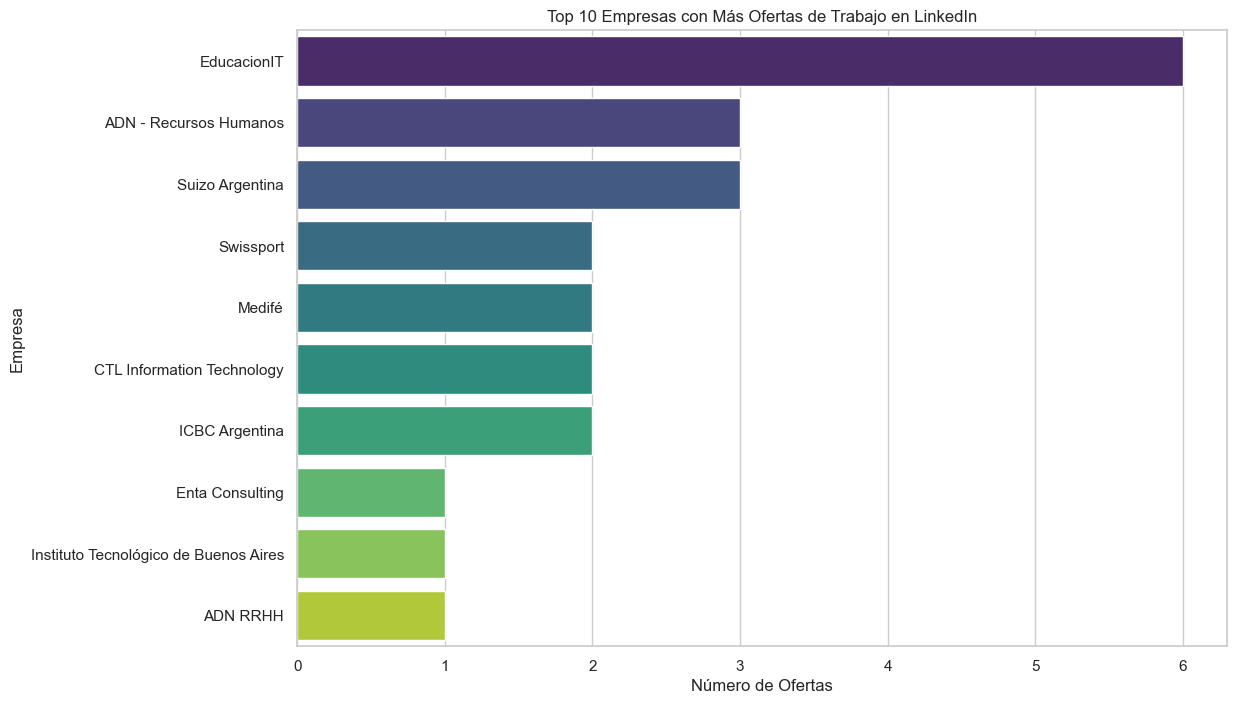

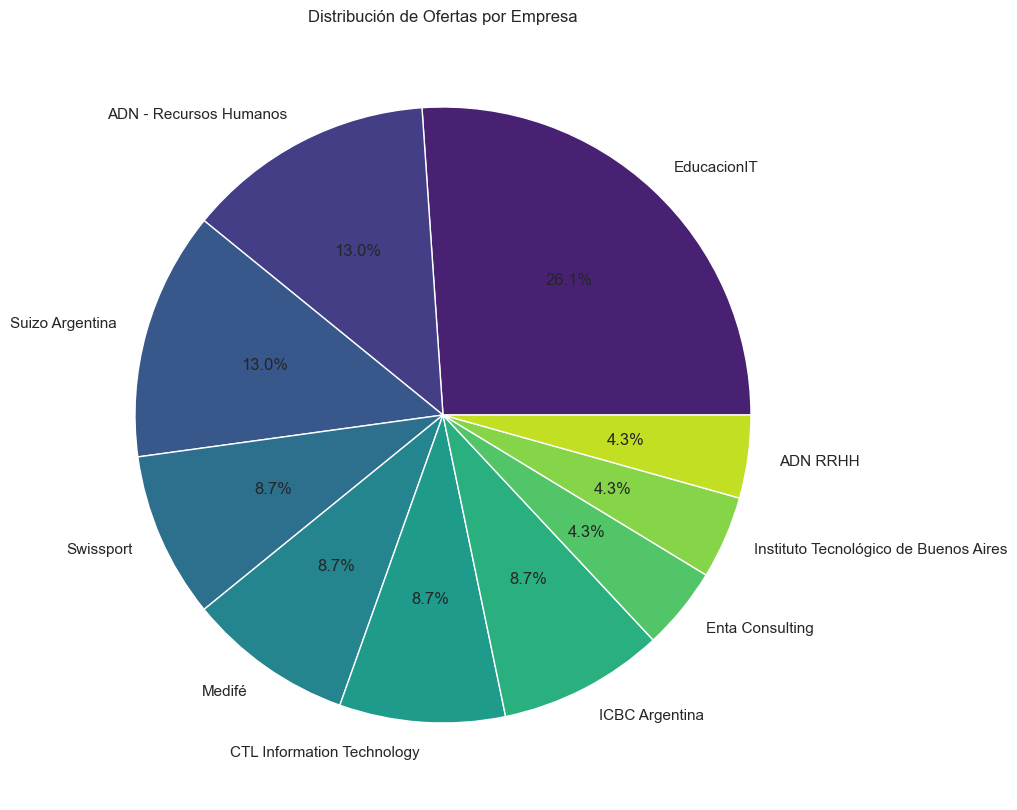

C:\Users\Juanchi\AppData\Local\Temp\ipykernel_2764\3412414966.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TiempoPublicado', y='Empresa', data=data, order=ofertas_por_empresa.index, palette='viridis')


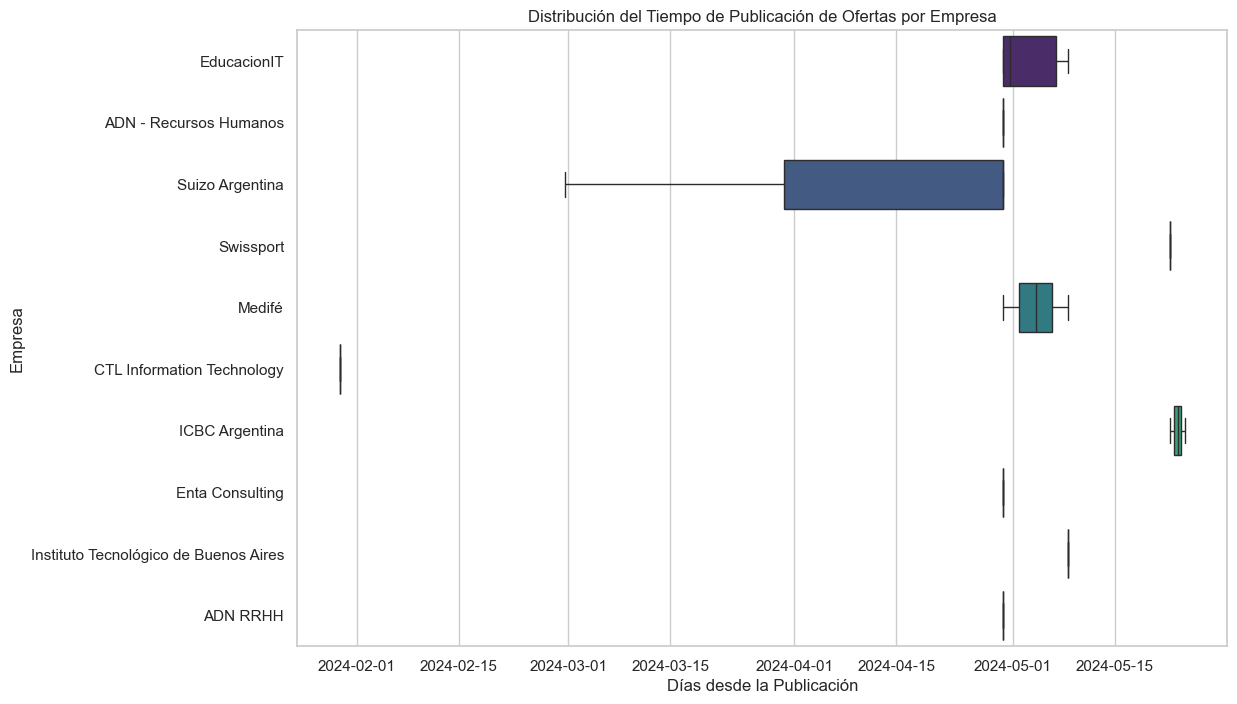

C:\Users\Juanchi\AppData\Local\Temp\ipykernel_2764\3412414966.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ofertas_por_ubicacion.values, y=ofertas_por_ubicacion.index, palette='viridis')


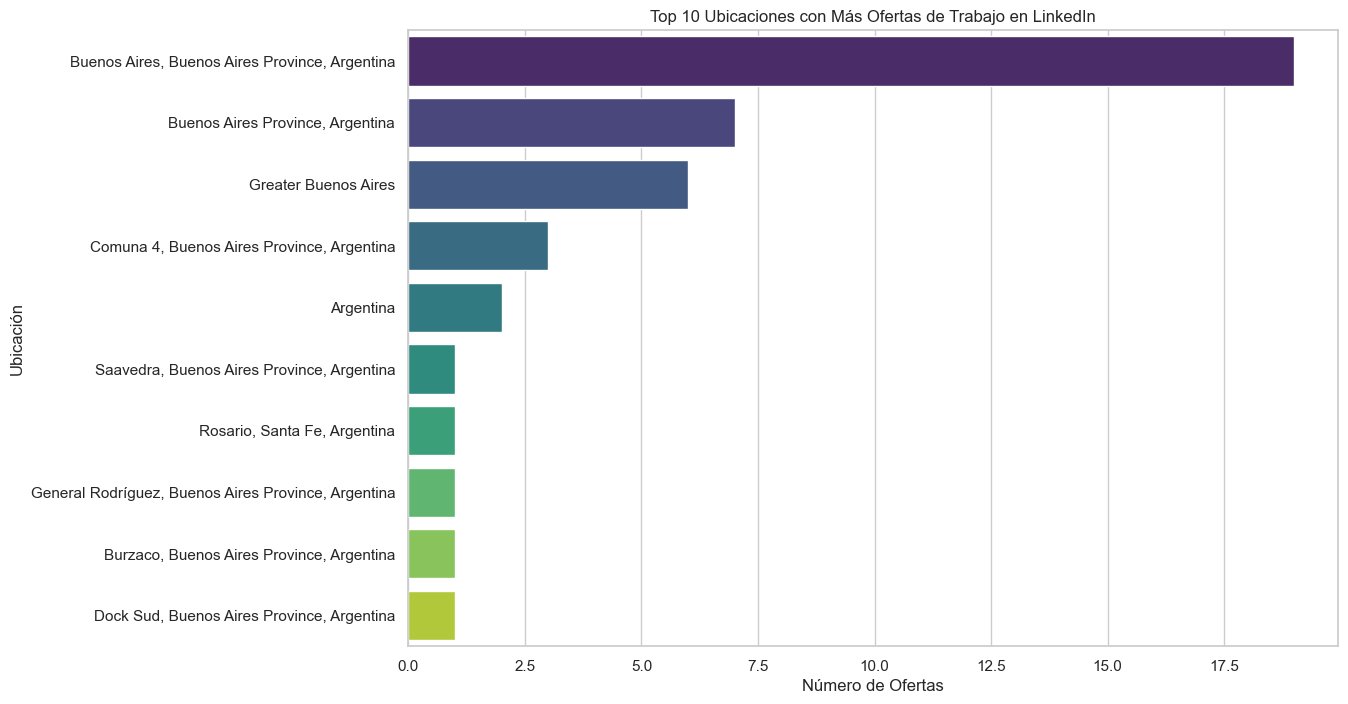

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from dateutil.parser import parse as parse_date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Función para obtener texto de elementos
def obtenerTexto(elementos):
    return [elemento.getText().strip() for elemento in elementos]

# Función para convertir fechas relativas en fechas válidas
def convertir_fecha(fecha_str):
    if "month" in fecha_str:
        meses = int(fecha_str.split()[0])
        fecha = pd.Timestamp.now() - relativedelta(months=meses)
    elif "week" in fecha_str:
        semanas = int(fecha_str.split()[0])
        fecha = pd.Timestamp.now() - relativedelta(weeks=semanas)
    elif "day" in fecha_str:
        dias = int(fecha_str.split()[0])
        fecha = pd.Timestamp.now() - relativedelta(days=dias)
    else:
        fecha = parse_date(fecha_str)
    return fecha

# Obtener la página y crear el objeto BeautifulSoup
pagina = requests.get("https://www.linkedin.com/jobs/search?keywords=Sistemas&location=Argentina&geoId=100446943&trk=public_jobs_jobs-search-bar_search-submit&currentJobId=3921453317&position=7&pageNum=0")
objeto_sopa = BeautifulSoup(pagina.content, 'html.parser')

# Extraer los datos de la página
puesto = objeto_sopa.find_all('h3', class_='base-search-card__title')
empresa = objeto_sopa.find_all('h4', class_='base-search-card__subtitle')
ubicacion = objeto_sopa.find_all('span', class_='job-search-card__location')
jornada = objeto_sopa.find_all('time', class_='job-search-card__listdate')

# Llenar el diccionario con los datos extraídos
diccionario = {
    "Puesto": obtenerTexto(puesto),
    "Empresa": obtenerTexto(empresa),
    "Ubicación": obtenerTexto(ubicacion),
    "TiempoPublicado": [convertir_fecha(text) for text in obtenerTexto(jornada)]
}

# Nos quedamos con los 50 primeros elementos
for key in diccionario:
    diccionario[key] = diccionario[key][:50]

# Convertir el diccionario en un DataFrame de pandas
data = pd.DataFrame(diccionario)

# Guardar el DataFrame en un archivo CSV
data.to_csv("./ofertasLinkedIn.csv", index=False)

# Cargar los datos del archivo CSV
data = pd.read_csv("./ofertasLinkedIn.csv")

# Contar el número de ofertas por empresa
ofertas_por_empresa = data['Empresa'].value_counts().head(10)  # Tomamos las 10 empresas con más ofertas

# Contar el número de ofertas por día
data['TiempoPublicado'] = pd.to_datetime(data['TiempoPublicado'])
ofertas_por_dia = data.groupby(data['TiempoPublicado'].dt.date).size()

# Configurar estilo de los gráficos
sns.set_theme(style="whitegrid")

# 1. Gráfico de Barras
plt.figure(figsize=(12, 8))
sns.barplot(x=ofertas_por_empresa.values, y=ofertas_por_empresa.index, palette='viridis')
plt.xlabel('Número de Ofertas')
plt.ylabel('Empresa')
plt.title('Top 10 Empresas con Más Ofertas de Trabajo en LinkedIn')
plt.show()

# 2. Gráfico de Pastel
plt.figure(figsize=(10, 10))
plt.pie(ofertas_por_empresa, labels=ofertas_por_empresa.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(ofertas_por_empresa)))
plt.title('Distribución de Ofertas por Empresa')
plt.show()

# 3. Gráfico de Caja (Box Plot) del tiempo de publicación de las ofertas por empresa
plt.figure(figsize=(12, 8))
sns.boxplot(x='TiempoPublicado', y='Empresa', data=data, order=ofertas_por_empresa.index, palette='viridis')
plt.xlabel('Días desde la Publicación')
plt.ylabel('Empresa')
plt.title('Distribución del Tiempo de Publicación de Ofertas por Empresa')
plt.show()

# 4. Gráfico de Barras para mostrar locaciones y la cantidad de trabajos en cada una
ofertas_por_ubicacion = data['Ubicación'].value_counts().head(10)  # Tomamos las 10 ubicaciones con más ofertas

plt.figure(figsize=(12, 8))
sns.barplot(x=ofertas_por_ubicacion.values, y=ofertas_por_ubicacion.index, palette='viridis')
plt.xlabel('Número de Ofertas')
plt.ylabel('Ubicación')
plt.title('Top 10 Ubicaciones con Más Ofertas de Trabajo en LinkedIn')
plt.show()
